<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/Outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

- Data Exploration, Outlier detection, Feature Engineering
- What is an Outlier?
  - Angle-Based Outlier Detection (ABOD) and KNN
- 5 ways to detect anomalies
  - Standard Deviation
  - Isolation Forest
  - DBScan
  - Boxplots
  - Robust Random Cut Forest (RRCF)
    - Creating the tree
    - Inserting point
    - Deleting point
  - Robust Random Cut Forest code..!!!
- Treating Missing values
- Univariate Analysis
- Bi-variate Analysis
  - Chi-square Test(Categorical and categorical)
  - Code for chi-square test..!!!
  - Types of Combinations
- Feature Engineering

## Data Exploration, Outlier detection, Feature Engineering

Data exploration consists of many aspects, such as variable identification, treating missing values, feature engineering, etc. Detecting and treating outliers is a major factor in the data exploration stage. The quality of your inputs decide the quality of your output!.

Anomalies, or outliers, can be a serious issue when training machine learning algorithms or applying statistical techniques. They are often the result of errors in measurements or exceptional system conditions and therefore do not describe the common functioning of the underlying system. Indeed, the best practice is to implement an outlier removal phase before proceeding with further analysis. 

In python, PyOD is a library that can be used to detect outliers in your data. It provides access to more than 20 different algorithms to detect outliers and is compatible with both Python 2 and 3.


This article assumes you have a basic knowledge of machine learning algorithms and the Python language. 

## What is an Outlier?
An outlier is any data point which differs greatly from the rest of the observations in a dataset. Let’s see some real life examples to understand outlier detection:

When one student averages over 90% while the rest of the class is at 70% – a clear outlier
While analyzing a certain customer’s purchase patterns, it turns out there’s suddenly an entry for a very high value. While most of his/her transactions fall below Rs. 10,000, this entry is for Rs. 1,00,000. It could be an electronic item purchase – whatever the reason, it’s an outlier in the overall data
How about Usain Bolt? Those record breaking sprints are definitely outliers when you factor in the majority of athletes.

![alt text](https://i0.wp.com/s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/02/impact-of-outliers.png?resize=800%2C400&ssl=1)

### Angle-Based Outlier Detection (ABOD) and KNN
### Angle-Based Outlier Detection (ABOD)
It considers the relationship between each point and its neighbor(s)- It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
- ABOD performs well on multi-dimensional data.PyOD provides two different versions of ABOD:
- Fast ABOD: Uses k-nearest neighbors to approximate
- Original ABOD: Considers all training points with high-time complexity
 

### k-Nearest Neighbors Detector
For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:
- Largest: Uses the distance of the kth neighbor as the outlier score
- Mean: Uses the average of all k neighbors as the outlier score
- Median: Uses the median of the distance to k neighbors as the outlier score.

*credits= analyticsindia, analyticsvidhya*



In [ ]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!

     |████████████████████████████████| 92kB 5.8MB/s 
  Created wheel for pyod: filename=pyod-0.7.4-cp36-none-any.whl size=95437 sha256=227f7d7ca0a967493bcca746362ac97fba2ffd533185f81f7e8c768f6e50277b
  Stored in directory: /root/.cache/pip/wheels/30/2f/4a/90c7bf3403325384b1c2ef5eb50d65d7467b8dd1b64a92ab82
Successfully built pyod
Requirement already up-to-date: pyod in /usr/local/lib/python3.6/dist-packages (0.7.4)


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

In [ ]:

from pyod.models.abod import ABOD
from pyod.models.knn import KNN


Text(0, 0.5, 'F2')

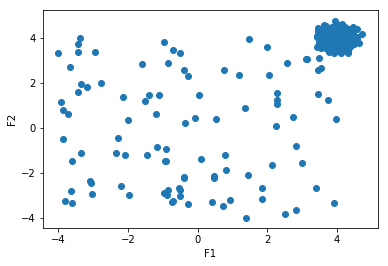

In [ ]:
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
X_train, Y_train = generate_data(n_train=1000,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 

In [ ]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}

No of Errors :  Angle-based Outlier Detector (ABOD) 12
No of Errors :  K Nearest Neighbors (KNN) 2


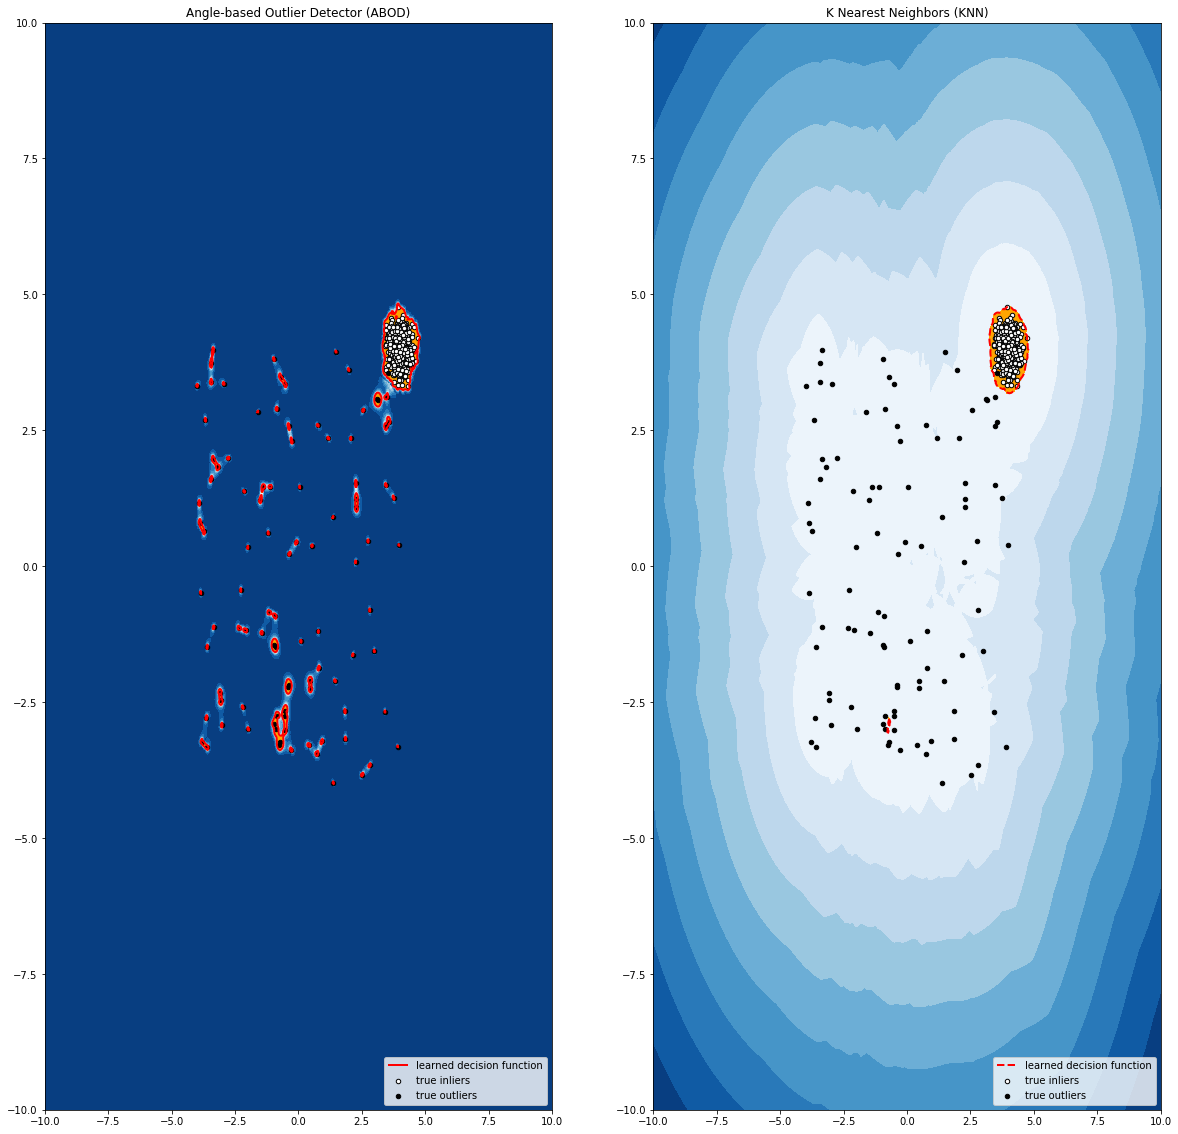

In [ ]:
#set the figure size
plt.figure(figsize=(20, 20))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

## 5 ways to detect anomalies

**Let's explore 5 common ways to detect anomalies starting with the most simple way.**

1. Standard deviation
2. Isolation forest
3. DBscan
4. Boxplot
5. Robust random cut forest 

### Standard Deviation

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.

f we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 4, as in the test dataset above, then all data in the sample between 46 and 54 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%
A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

![alt text](https://miro.medium.com/max/1474/1*rV7rq7F_uB5gwjzzGJ9VqA.png)

Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers.

In [ ]:

# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 4 * randn(50000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


mean=50.015 stdv=4.003


In [ ]:

# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 1
lower, upper = data_mean - cut_off, data_mean + cut_off

In [ ]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 15880
Non-outlier observations: 34120


So far we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution.

You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions.

### Isolation Forest

It is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.
This method works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. Since this article is focusing on the implementation rather than the know-how, I will not go any further on how the algorithm works. 

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data)
preds

array([-1,  1, -1, ...,  1,  1,  1])

### DBScan

DBScan is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data. Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. In this instance, I will show you an example of using DBScan but before we start, let’s cover some important concepts.

 DBScan has three important concepts:

**Core Points**: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP)is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps. eps is the maximum distance between two samples for them to be considered as in the same cluster.

**Border Points** are in the same cluster as core points but much further away from the centre of the cluster.

![alt text](https://miro.medium.com/max/352/1*d35zOOP2PQ13ZROxr9ddjA.png)


In [ ]:

from sklearn.cluster import DBSCAN
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

94

###Boxplots

Box plots are a graphical depiction of numerical data through their quantiles. It is a very simple but effective way to visualize outliers. Think about the lower and upper whiskers as the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous. Here is the code to plot a box plot:

![alt text](https://miro.medium.com/max/600/1*AU07MCIdvUnjskY1XH9auw.png)


*credit=Will Badr, Analytics india mag, Kdnuggets*

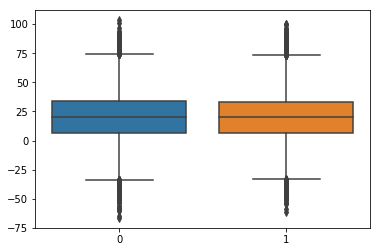

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=random_data)


###  Robust Random Cut Forest (RRCF) 


It is an ensemble method for detecting outliers in streaming data. RRCF offers a number of features that many competing anomaly detection algorithms lack. Specifically, RRCF:

- Is designed to handle streaming data.
- Performs well on high-dimensional data.
- Reduces the influence of irrelevant dimensions.
- Gracefully handles duplicates and near-duplicates that could otherwise mask the presence of outliers.
- Features an anomaly-scoring algorithm with a clear underlying statistical meaning.

*credits- Real-time water systems lab*


In [ ]:
!pip install crcf

#### Creating the tree

rrcf

In [ ]:
import numpy as np
import rrcf

# A (robust) random cut tree can be instantiated from a point set (n x d)
X = np.random.randn(100, 2)
tree = rrcf.RCTree(X)

# A random cut tree can also be instantiated with no points
tree = rrcf.RCTree()

#### Inserting point

In [ ]:
tree = rrcf.RCTree()

for i in range(6):
    x = np.random.randn(2)
    tree.insert_point(x, index=i)

#### Deleting point

In [ ]:
tree.forget_point(2)

Leaf(2)

In [ ]:
# Seed tree with zero-mean, normally distributed data
X = np.random.randn(100,2)
tree = rrcf.RCTree(X)

# Generate an inlier and outlier point
inlier = np.array([0, 0])
outlier = np.array([4, 4])

# Insert into tree
tree.insert_point(inlier, index='inlier')
tree.insert_point(outlier, index='outlier')

Leaf(outlier)

In [ ]:
tree.codisp('inlier')

9.0

In [ ]:
tree.codisp('outlier')

10.2

crcf jimbhuges

###  Robust Random Cut Forest code..!!!
Random Cut Forest (RCF) algorithm is Amazon’s unsupervised algorithm for detecting anomalies. 

It works by associating an anomaly score as well. Low score values indicate that the data point is considered “normal.” High values indicate the presence of an anomaly in the data. The definitions of “low” and “high” depend on the application but common practice suggests that scores beyond three standard deviations from the mean score are considered anomalous. The details of the algorithm can be found in this [paper](http://proceedings.mlr.press/v48/guha16.pdf)
The great thing about this algorithm is that it works with very high dimensional data. It can also work on real-time streaming data (built in AWS Kinesis Analytics) as well as offline data.


*credits= Will Badr*

In [ ]:
### demo credit- jmbhughes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# change this block to change the test data

def gaussian_mixture(ps, means, covs, count=100):
    counts = np.random.multinomial(count, ps, size=1)[0] # how many points are from each component
    
    data = [np.random.multivariate_normal(means[i], covs[i], count) for i, count in enumerate(counts)] # generate
    data = np.concatenate(data) # combine the data
    
    # shuffling the data
    new_index = np.arange(data.shape[0])
    np.random.shuffle(np.arange(data.shape[0]))
    data = data[new_index]
    return data

def generate_test(N, anomalous_rate):
    # Calculate how many data points in each category
    typical_count, anomalous_count = np.random.multinomial(N, [1-anomalous_rate, anomalous_rate], size=1)[0]

    # Describe typical data with a 2 component Gaussian mixture
    typical_means = [[8, 8],      # mean of component 1
                    [-8, -8]]     # mean of component 2
    typical_covs = [[[1,0],[0,1]],  # covariance matrix of component 1
                    [[1,0],[0,1]]]  # covariance matrix of compoinent 2
    typical_ps = [0.5,              # probability of component 1
                  0.5]              # probability of component 2
    typical_data = gaussian_mixture(typical_ps, typical_means, typical_covs, count=typical_count)

    # Describe anomalous data with a 2 component Gaussian mixture
    anomalous_means = [[20, -20],            # mean of component 1
                      [0, 0]]                # mean of component 2
    anomalous_covs = [[[0.5, 0], [0, 0.5]],  # covariance of component 1
                      [[10, 0], [0, 10]]]    # covariance of component 2
    anomalous_ps = [0.1,                      # probability of component 1
                  0.9]                       # probability of component 2
    anomalous_data = gaussian_mixture(anomalous_ps, anomalous_means, anomalous_covs, count=anomalous_count)

    # Combine the data but preserve the labeling
    x = np.concatenate([typical_data, anomalous_data])
    y = np.concatenate([np.repeat(0, typical_count), np.repeat(1, anomalous_count)])
    new_index = np.arange(y.shape[0])
    np.random.shuffle(new_index)
    y = y[new_index]
    x = x[new_index]
    return x, y

def plot_anom(x, y):
    """ plots anomalies with red and typical with green"""
    fig, ax = plt.subplots()
    ax.scatter(x[:,0], x[:,1], s=3, 
               c=['red' if yy else 'green' for yy in y])
    fig.show()

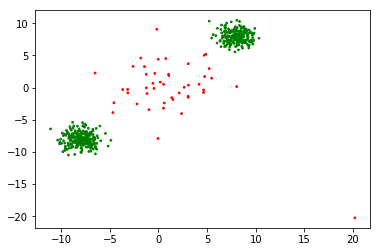

In [ ]:

N = 500  # number of data points to generate
anomalous_rate = 0.1  # the rate at which anomalous points occur
x, y = generate_test(N, anomalous_rate)
plot_anom(x, y)

In [ ]:
!pip3 install crcf

## Treating Missing values
### Quick classification of missing data

![alt text](https://image.slidesharecdn.com/refresherinstatisticsandanalysisskill-160911041011/95/refresher-in-statistics-and-analysis-skill-52-638.jpg?cb=1473567122)


*img source:-slideshare*

#### There are three types of missing data:

**MCAR:** Missing Completely At Random. It is the highest level of randomness. This means that the missing values in any features are not dependent on any other features values. This is the desirable scenario in case of missing data.

**MAR:** Missing At Random. This means that the missing values in any feature is dependent on values of other features.

**MNAR**: Missing Not At Random. Missing not at random data is a more serious issue and in this case,  it might be wise to check the data gathering process further and try to understand why the information is missing. For instance, if most of the people in a survey did not answer a certain question, why did they do that? Was the question unclear?

 

### What to do with the missing values?

Now that we have identified the missing values in our data, next we should check the extent of the missing values to decide the further course of action.

### Ignore the missing values

Missing data under 10% for an individual case or observation can generally be ignored, except when the missing data is a MAR or MNAR.
The number of complete cases i.e. observation with no missing data must be sufficient for the selected analysis technique if the incomplete cases are not considered.
Drop the missing values

### Dropping a variable

If the data is MCAR or MAR and the number of missing values in a feature is very high, then that feature should be left out of the analysis. If missing data for a certain feature or sample is more than 5% then you probably should leave that feature or sample out.
If the cases or observations have missing values for target variables(s), it is advisable to delete the dependent variable(s) to avoid any artificial increase in relationships with independent variables.
Case Deletion

In this method, cases which have missing values for one or more features are deleted. If the cases having missing values are small in number, it is better to drop them. Though this is an easy approach, it might lead to a significant decrease in the sample size. Also, the data may not always be missing completely at random. This may lead to biased estimation of parameters.

### Imputation

Imputation is the process of substituting the missing data by some statistical methods. Imputation is useful in the sense that it preserves all cases by replacing missing data with an estimated value based on other available information. But imputation methods should be used carefully as most of them introduce a large amount of bias and reduce variance in the dataset.

### Imputation by Mean/Mode/Median

If the missing values in a column or feature are numerical, the values can be imputed by the mean of the complete cases of the variable. Mean can be replaced by median if the feature is suspected to have outliers. For a categorical feature, the missing values could be replaced by the mode of the column. The major drawback of this method is that it reduces the variance of the imputed variables. This method also reduces the correlation between the imputed variables and other variables because the imputed values are just estimates and will not be related to other values inherently.

### Regression Methods

The variables with missing values are treated as dependent variables and variables with complete cases are taken as predictors or independent variables. The independent variables are used to fit a linear equation for the observed values of the dependent variable. This equation is then used to predict values for the missing data points.

The disadvantage of this method is that the identified independent variables would have a high correlation with the dependent variable by virtue of selection. This would result in fitting the missing values a little too well and reducing the uncertainty about that value. Also, this assumes that relationship is linear which might not be the case in reality.

### K-Nearest Neighbour Imputation (KNN)

This method uses k-nearest neighbour algorithms to estimate and replace missing data. The k-neighbours are chosen using some distance measure and their average is used as an imputation estimate. This could be used for estimating both qualitative attributes (the most frequent value among the k nearest neighbours) and quantitative attributes (the mean of the k nearest neighbours).

One should try different values of k with different distance metrics to find the best match. The distance metric could be chosen based on the properties of the data. For example, Euclidean is a good distance measure to use if the input variables are similar in type (e.g. all measured widths and heights). Manhattan distance is a good measure to use if the input variables are not similar in type (such as age, gender, height, etc.).

The advantage of using KNN is that it is simple to implement. But it suffers from the curse of dimensionality. It works well for a small number of variables but becomes computationally inefficient when the number of variables is large.


![alt text](https://amueller.github.io/COMS4995-s18/slides/aml-08-021218-imputation-feature-selection/images/mean_knn_rf_comparison.png)

### Multiple Imputation

Multiple imputations is an iterative method in which multiple values are estimated for the missing data points using the distribution of the observed data. The advantage of this method is that it reflects the uncertainty around the true value and returns unbiased estimates.

### MI involves the following three basic steps:

**Imputation:** The missing data are filled in with estimated values and a complete data set is created. This process of imputation is repeated m times and m datasets are created.

**Analysis:** Each of the m complete data sets is then analysed using a statistical method of interest (e.g. linear regression).

**Pooling:** The parameter estimates (e.g. coefficients and standard errors) obtained from each analysed data set are then averaged to get a single point estimate.

Python’s Scikit-learn has methods – impute.SimpleImputer for univariate (single variable) imputations and impute.IterativeImputer for multivariate imputations.

*Credits-Edvancer, Will Badr, kaggle*

In [ ]:
##mean-impute
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

20640
20640


In [ ]:
!pip install impyute

In [ ]:
##knn impute
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

![alt text](https://miro.medium.com/max/600/1*b9BXv0uAkbSAn8MJIa4-_Q.gif)

## Univariate Analysis


Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved.

Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.
![alt text](https://image.slidesharecdn.com/seminarunivariate-140709142039-phpapp01/95/univariate-analysis-13-638.jpg?cb=1404915679)

*img source:-slideshare*

### Descriptive methods

Descriptive statistics describe a sample or population. They can be part of exploratory data analysis.

The appropriate statistic depends on the level of measurement. For nominal variables, a frequency table and a listing of the mode(s) is sufficient. For interval level variables, the arithmetic mean (average) and standard deviation are added to the toolbox and, for ratio level variables, we add the geometric mean and harmonic mean as measures of central tendency and the coefficient of variation as a measure of dispersion.

For interval and ratio level data, further descriptors include the variable's skewness and kurtosis.

## Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be:
- Categorical & Categorical.
- Categorical & Continuous and 
- Continuous & Continuous.


 Different methods are used to tackle these combinations during analysis process.

### Chi-square Test(Categorical and categorical)
The chi-square test can be used to determine the association between categorical variables. It is based on the difference between the expected frequencies (e) and the observed frequencies (n) in one or more categories in the frequency table. The chi-square distribution returns a probability for the computed chi-square and the degree of freedom. A probability of zero shows a complete dependency between two categorical variables and a probability of one means that two categorical variables are completely independent. Tchouproff Contingency Coefficient measures the amount of dependency between two categorical variables.


### Contingency Table
A categorical variable is a variable that may take on one of a set of labels.(ml mastery)

An example might be sex, which may be summarized as male or female. The variable is ‘sex‘ and the labels or factors of the variable are ‘male‘ and ‘female‘ in this case.



```
Sex,	Interest.
Male,	Art.
Female,	Math
Male, 	Science
Male,	Math.
```



We may wish to look at a summary of a categorical variable as it pertains to another categorical variable. For example, sex and interest, where interest may have the labels ‘science‘, ‘math‘, or ‘art‘.

We can summarize the collected observations in a table with one variable corresponding to columns and another variable corresponding to rows. Each cell in the table corresponds to the count or frequency of observations that correspond to the row and column categories.

Historically, a table summarization of two categorical variables in this form is called a contingency table.



```
        Science,	Math,	Art
Male         20,      30,    15
Female       20,      15,    30
```



The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in math or science depend on gender, or are they independent?

This is challenging to determine from the table alone; instead, we can use a statistical method called the Pearson’s Chi-Squared test.

### Pearson’s Chi-Squared Test

- The Pearson’s Chi-Squared test, or just Chi-Squared test for short, is named for Karl Pearson, although there are variations on the test.

- The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X).


- Given the Sex/Interest example above, the number of observations for a category (such as male and female) may or may not the same. 

- Nevertheless, we can calculate the expected frequency of observations in each Interest group and see whether the partitioning of interests by Sex results in similar or different frequencies.

- The Chi-Squared test does this for a contingency table, first calculating the expected frequencies for the groups, then determining whether the division of the groups, called the observed frequencies, matches the expected frequencies.

- The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

- **If Statistic >= Critical Value:** significant result, reject null hypothesis (H0), dependent.

- **If Statistic < Critical Value:** not significant result, fail to reject null hypothesis (H0), independent.
 



— *Page 525, Statistics, Fourth Edition, 2007.
able by chance alone (known as the expected frequencies).*

— *Page 162, Statistics in Plain English, Third Edition, 2010*. 

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as:



```
degrees of freedom: (rows - 1) * (cols - 1)
```




*credits= saedsayad,mlmastery, analyticsvidhya, analyticsindiamag, statsoft*


### Code for chi-square test..!!!

In [ ]:

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


### Types of Combinations
### Continuous & Continuous: 

Categorical and categorical has been discussed above. This section covers continuous and continuous type, categorical and continuous type.

 While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

![alt text](https://miro.medium.com/max/1000/1*6KNXPv-_3s7cJrcOQxbZCw.png)

*img source:- medium*


### Categorical & Continuous:

 While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

- Z-Test/ T-Test:- Either test assess whether mean of two groups are statistically different from each other or not
![alt text](https://image.slidesharecdn.com/z-test-170412150226/95/ztest-with-examples-13-638.jpg?cb=1546230216)

*img source:-slideshare*

- The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.
![alt text](https://brightcove04pmdo-a.akamaihd.net/3764097123001/3764097123001_5036435216001_5036376517001-vs.jpg?pubId=3764097123001&videoId=5036376517001)


- ANOVA:- It assesses whether the average of more than two groups is statistically different.

![alt text](https://i.stack.imgur.com/527aJ.jpg)



   *img source:-stackexchange*

- Example: Suppose, we want to test the effect of five different exercises. For this, we recruit 20 men and assign one type of exercise to 4 men (5 groups). Their weights are recorded after a few weeks. We need to find out whether the effect of these exercises on them is significantly different or not. This can be done by comparing the weights of the 5 groups of 4 men each.



## Feature Engineering

![alt text](https://www.safaribooksonline.com/library/cover/9781491953235/360h/)

Feature engineering is the science (and art) of extracting more information from existing data. We are not adding any new data here, but actually making the data we already have more useful.

For example, let’s say that we are trying to predict foot fall in a restaurant based on dates. If  we try and use the dates directly, we may not be able to extract meaningful insights from the data. This is because the foot fall is less affected by the day of the month than it is by the day of the week. Now this information about day of week is implicit in our data. 

 We need to bring it out to make the model better. This exercising of bringing out information from data in known as feature engineering.

![alt text](https://miro.medium.com/max/1820/1*DRjTGXIlE-bPHVZsVz1MzQ.png)

*Img source:-medium*
### Feature Engineering consists of two parts:

- Variable transformation
- Variable / Feature creation

### Variable Transformation
Transformation refers to the replacement of a variable by a function. For instance, replacing a  variable x by the square/cube root or logarithm x is a transformation. Or we can say transformation is a process that changes the distribution or relationship of a variable with others.

### When should we use Variable Transformation?
Change the scale:  When we want to change the scale of a variable(feature) or standardize its value. Suppose values of the variable are on different scales, in that case, one must use variable transformation, this transformation does not change the shape of the variable distribution.

### Transform complex non-linear relationships into linear relationships:
If two variables having a linear relationship is much better to fit a good model as compared to the non-linear or curved relation. Transformation helps us to convert a non-linear relation into the linear relation.

### Types of variable Transformation

- Square root Transformation
- Cube Root Transformations
- Logarithmic Transformation
- Reciprocal
- Binning

Square root transformation, Cube root and Logarithmic Transformation are using to reduce positive/right skewness.  Square root has the advantage that it can be applied to zero values. 
Cube root can be applied to  zero and negative values.

Logarithmic Transformation cannot be applied to It can not be applied to zero or negative values .
Reciprocal, although it can be applied to negative values, it is not useful unless all values are positive.
Binning is used to categorize variables. It is performed on original values, percentile or frequency. The decision of categorization technique is based on business understanding.

### Feature/variable creation

Feature/Variable Creation  is a process to generate a new feature (Variable) by using the existing variables. 
Suppose In the data set we have the date(dd-mm-yy) as an input variable. We can generate new variables like the day, month, year, week, weekday that may have the better relationship with target variable.
This step is used to highlight the hidden relationship in a variable.There are various techniques to create new features.

- Creating derived variables.
This refers to creating new variables from existing variable(s) using the set of functions or different methods.

- Creating dummy variables.
Dummy variables mostly used when we have to convert the categorical variable into numerical variables.  Dummy variables are also called Indicator Variables. It is useful to take the categorical variable as a predictor in statistical models

*credits- Steupanalytics, kdnuggets*
